In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Data Loading
path = "dataset/ENB2012_data.xlsx"
energy = pd.read_excel(path)

In [35]:
# Rename columns
energy.rename(columns={
    'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area',
    'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area',
    'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating Load', 'Y2': 'Cooling Load'
}, inplace=True)

In [ ]:
# Remove missing values
energy = energy.loc[(energy[['Glazing_Area', 'Glazing_Area_Distribution']] != 0).all(axis=1)]

In [48]:
energy.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating Load,Cooling Load
48,0.98,514.5,294.0,110.25,7.0,2,0.1,1,24.58,26.47
49,0.98,514.5,294.0,110.25,7.0,3,0.1,1,24.63,26.37
50,0.98,514.5,294.0,110.25,7.0,4,0.1,1,24.63,26.44
51,0.98,514.5,294.0,110.25,7.0,5,0.1,1,24.59,26.29
52,0.90,563.5,318.5,122.50,7.0,2,0.1,1,29.03,32.92


In [47]:
energy.describe().round(4)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating Load,Cooling Load
count,720.0000,720.0000,720.0000,720.0000,720.0000,720.0000,720.0000,720.0000,720.0000,720.0000
mean,0.7642,671.7083,318.5000,176.6042,5.2500,3.5000,0.2500,3.0000,22.8419,24.9132
std,0.1058,88.0899,43.6284,45.1679,1.7512,1.1188,0.1226,1.4152,10.0113,9.5143
min,0.6200,514.5000,245.0000,110.2500,3.5000,2.0000,0.1000,1.0000,10.0700,13.2000
25%,0.6825,606.3750,294.0000,140.8750,3.5000,2.7500,0.1000,2.0000,13.1700,15.7775
50%,0.7500,673.7500,318.5000,183.7500,5.2500,3.5000,0.2500,3.0000,21.0500,23.6700
75%,0.8300,741.1250,343.0000,220.5000,7.0000,4.2500,0.4000,4.0000,32.1350,33.4825
max,0.9800,808.5000,416.5000,220.5000,7.0000,5.0000,0.4000,5.0000,43.1000,48.0300


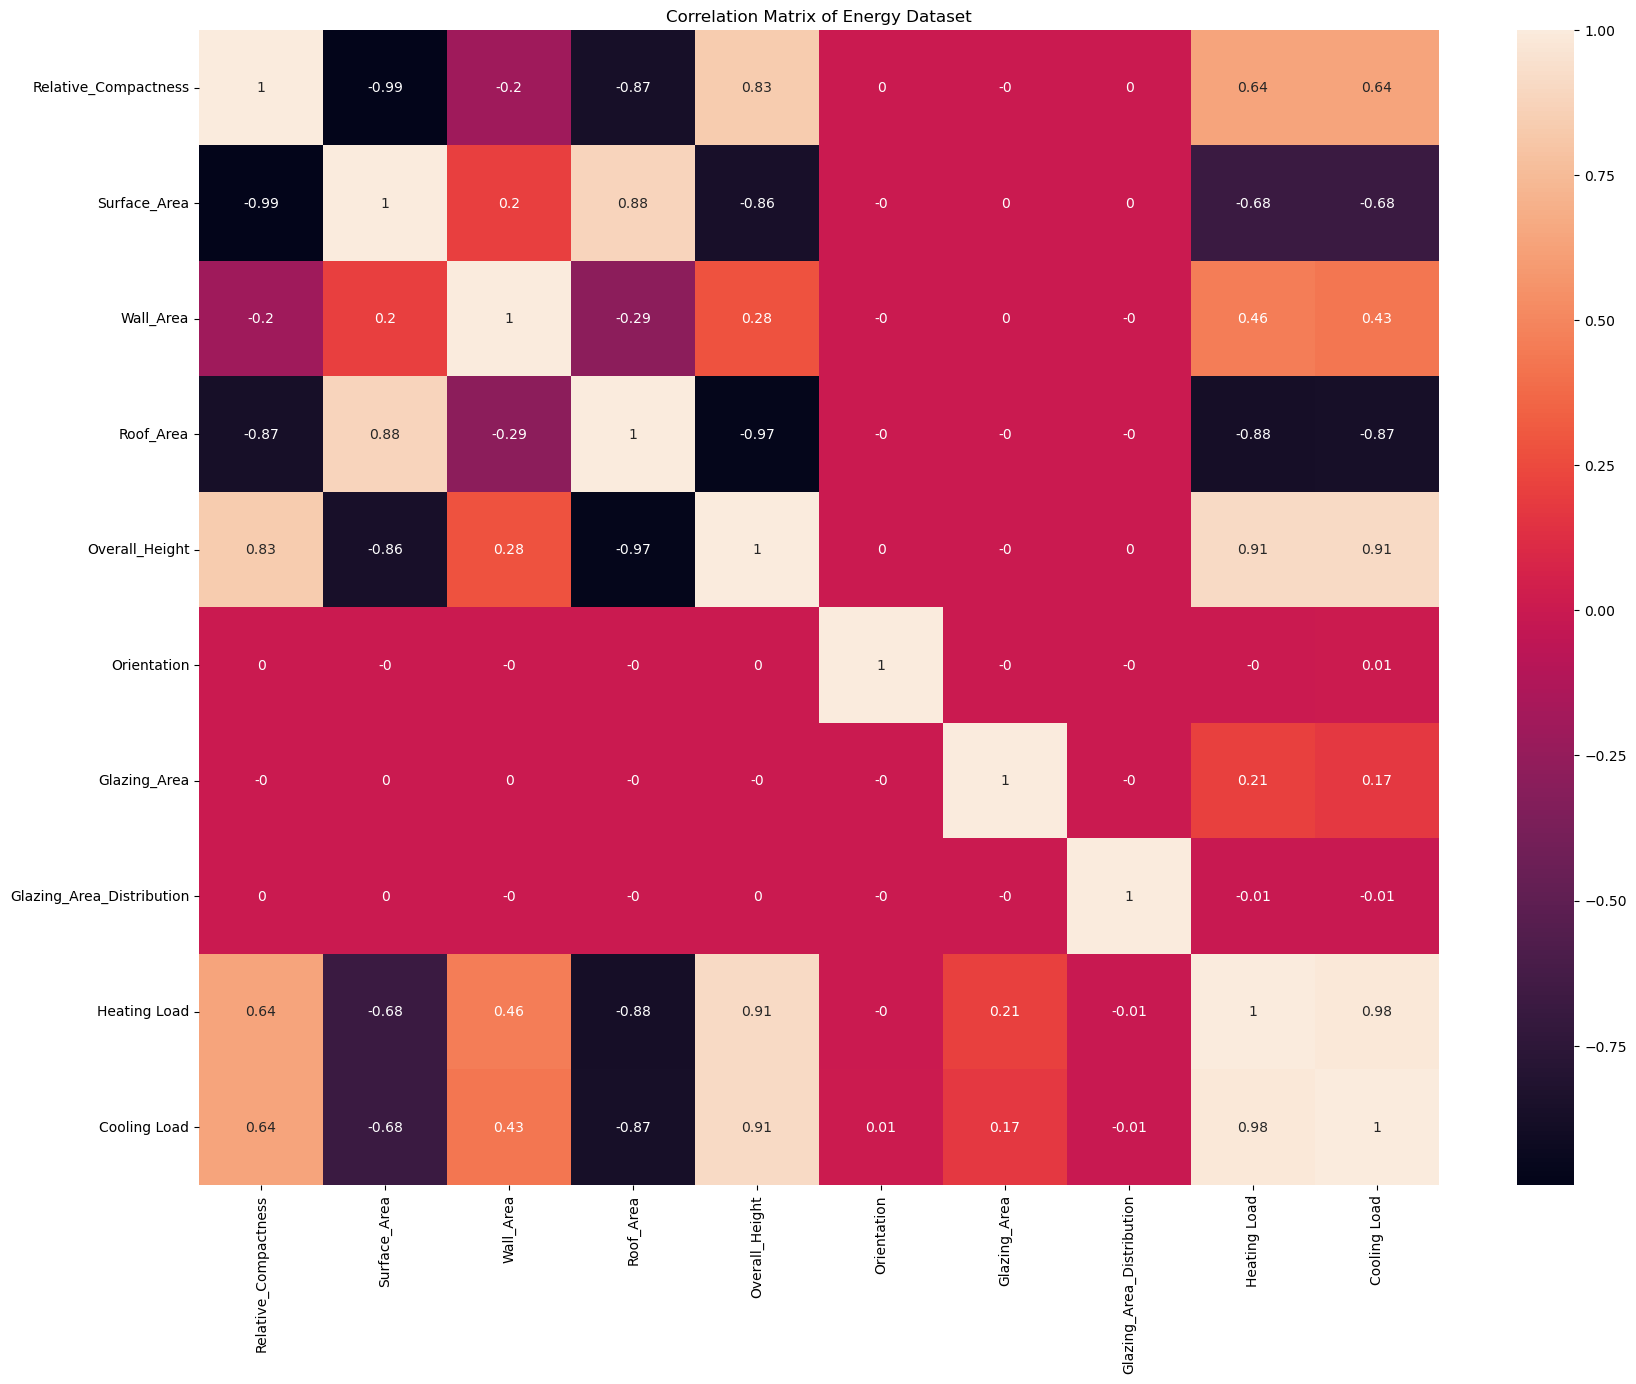

In [38]:
# Correlation matrix
plt.figure(figsize=(20,15))
correlation_matrix = energy.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.title("Correlation Matrix of Energy Dataset")
plt.show()

In [ ]:
# Splitting data manually
np.random.seed(123)
indices = np.random.permutation(len(energy))
split = int(len(energy) * 0.8)
train_idx, test_idx = indices[:split], indices[split:]

X = energy.drop(columns=['Orientation', 'Heating Load', 'Cooling Load']).values
y = energy[['Heating Load', 'Cooling Load']].values

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [40]:
# Normalization (Z-score Standardization)
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [42]:
X_train_df = pd.DataFrame(X_train, columns=energy.drop(columns=['Orientation', 'Heating Load', 'Cooling Load']).columns)
print(X_train_df.describe().round(4))

       Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  \
count              576.0000      576.0000   576.0000   576.0000   
mean                 0.0000       -0.0000    -0.0000     0.0000   
std                  1.0009        1.0009     1.0009     1.0009   
min                 -1.3436       -1.8332    -1.6707    -1.4949   
25%                 -0.9608       -0.7122    -0.5690    -0.8165   
50%                 -0.1952        0.1284    -0.0182     0.9474   
75%                  0.5704        0.9691     0.5327     0.9474   
max                  2.1015        1.5296     2.1852     0.9474   

       Overall_Height  Glazing_Area  Glazing_Area_Distribution  
count        576.0000      576.0000                   576.0000  
mean          -0.0000       -0.0000                    -0.0000  
std            1.0009        1.0009                     1.0009  
min           -0.9726       -1.2312                    -1.4174  
25%           -0.9726       -1.2312                    -0.7154  
50%   

In [43]:
# KNN model training
knn = KNNRegresi(n_neighbors=3)
knn.fit(X_train, y_train)

In [44]:
# Evaluation
train_rmse = root_mean_squared_error(y_train, knn.predict(X_train))
test_rmse = root_mean_squared_error(y_test, knn.predict(X_test))

# Display results
results = pd.DataFrame({'train_rmse': [train_rmse], 'test_rmse': [test_rmse]}, index=['knn'])
print(results)


     train_rmse  test_rmse
knn    1.286131    1.95599


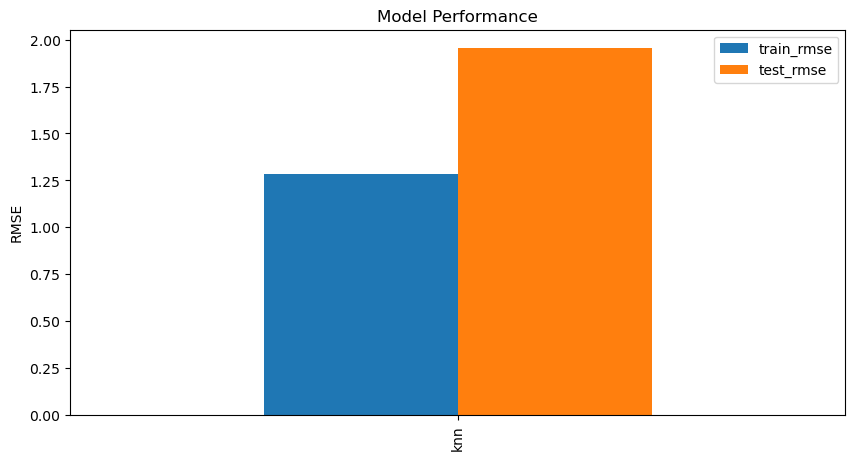

In [45]:
# Plotting results
results.plot(kind='bar', figsize=(10, 5))
plt.title("Model Performance")
plt.ylabel("RMSE")
plt.show()

In [46]:
# Predictions
prediction = X_test[:10]
pred_dict = {
    'Heating Load (true)': y_test[:10, 0],
    'Cooling Load (true)': y_test[:10, 1],
    'KNN_Heating Load (pred)': knn.predict(prediction)[:, 0],
    'KNN_Cooling Load (pred)': knn.predict(prediction)[:, 1]
}
pred_df = pd.DataFrame(pred_dict)
print(pred_df)

   Heating Load (true)  Cooling Load (true)  KNN_Heating Load (pred)  \
0                14.33                15.41                14.623333   
1                30.00                29.93                29.493333   
2                42.62                39.07                37.900000   
3                32.09                31.70                31.886667   
4                12.27                15.27                12.236667   
5                10.64                13.67                10.896667   
6                14.54                16.43                14.443333   
7                32.74                33.88                32.576667   
8                31.66                36.20                32.426667   
9                37.26                34.62                32.283333   

   KNN_Cooling Load (pred)  
0                15.336667  
1                31.980000  
2                38.093333  
3                36.066667  
4                14.970000  
5                13.850000  
6   